<a href="https://colab.research.google.com/github/RoyMassett/Roy_Ava_Clustering_2019/blob/master/notebooks/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
### Loading OASIS data and clustering

### Importing libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pip
from sklearn.decomposition import PCA

#import sys
#!{sys.executable} -m pip install numpy
#!pip install mglearn
#import mglearn

### Load dataset as pandas dataframe

In [111]:
#OASIS = pd.read_csv('../datasets/OASIS.csv')

url = 'https://raw.githubusercontent.com/RoyMassett/Roy_Ava_Clustering_2019/master/datasets/cognitive_scores.csv'
OASIS = pd.read_csv(url)
OASIS.head(10)

,ADRC_ADRCCLINICALDATA ID,Subject,Date,Age,mmse,ageAtEntry,cdr,commun,dx0,dx1,dx2,dx3,dx4,dx5,homehobb,judgment,memory,orient,perscare,apoe,sumbox,acsparnt,height,weight,primStudy,acsStudy
0,OAS30041_ClinicalData_d0000,OAS30041,NaN,NaN,NaN,65.122520,0.0,0.0,NaN,.,.,.,.,.,0.0,0.0,0.0,0.0,0.0,33.0,0.0,NaN,NaN,NaN,NaN,NaN
1,OAS30041_ClinicalData_d0366,OAS30041,NaN,NaN,NaN,65.122520,0.0,0.0,NaN,.,.,.,.,.,0.0,0.0,0.0,0.0,0.0,33.0,0.0,NaN,NaN,NaN,NaN,NaN
2,OAS30041_ClinicalData_d0725,OAS30041,NaN,NaN,NaN,65.122520,0.0,0.0,NaN,.,.,.,.,.,0.0,0.0,0.0,0.0,0.0,33.0,0.0,NaN,NaN,NaN,NaN,NaN
3,OAS30194_ClinicalData_d0000,OAS30194,NaN,NaN,NaN,60.676250,0.0,0.0,NaN,.,.,.,.,.,0.0,0.0,0.0,0.0,0.0,34.0,0.0,NaN,NaN,NaN,NaN,NaN
4,OAS30194_ClinicalData_d0367,OAS30194,NaN,NaN,NaN,60.676250,0.0,0.0,NaN,.,.,.,.,.,0.0,0.0,0.0,0.0,0.0,34.0,0.0,NaN,NaN,NaN,NaN,NaN
5,OAS30314_ClinicalData_d0000,OAS30314,NaN,NaN,NaN,56.561260,0.5,0.5,NaN,.,.,.,.,.,0.0,0.0,0.5,0.0,1.0,34.0,2.0,NaN,NaN,NaN,NaN,NaN
6,OAS30314_ClinicalData_d0401,OAS30314,NaN,NaN,NaN,56.561260,0.0,0.0,NaN,.,.,.,.,.,0.0,0.0,0.0,0.0,0.0,34.0,0.0,NaN,NaN,NaN,NaN,NaN
7,OAS30314_ClinicalData_d0808,OAS30314,NaN,NaN,NaN,56.561260,0.5,0.0,NaN,.,.,.,.,.,0.0,0.0,0.5,0.0,0.0,34.0,0.5,NaN,NaN,NaN,NaN,NaN
8,OAS30365_ClinicalData_d0000,OAS30365,NaN,NaN,NaN,58.502396,0.0,0.0,NaN,.,.,.,.,.,0.0,0.0,0.0,0.0,0.0,33.0,0.0,NaN,NaN,NaN,NaN,NaN
9,OAS30365_ClinicalData_d0369,OAS30365,NaN,NaN,NaN,58.502396,0.0,0.0,NaN,.,.,.,.,.,0.0,0.0,0.0,0.0,0.0,33.0,0.0,NaN,NaN,NaN,NaN,NaN


In [37]:
#OASIS.drop(['Subject', 'M/F', 'Hand', 'YOB'], axis=1, inplace=True)
#OASIS['mmse']
OASIS.drop(['Subject', 'Date', 'Age', 'ageAtEntry'], axis= 1, inplace = True)
OASIS = OASIS.fillna(-2)

OASIS.head()
 

,ADRC_ADRCCLINICALDATA ID,mmse,cdr,commun,dx1,dx2,dx3,dx4,dx5,homehobb,judgment,memory,orient,perscare,apoe,sumbox,acsparnt,height,weight,primStudy,acsStudy
0,OAS30001_ClinicalData_d0000,28.0,0.0,0.0,Cognitively normal,.,.,.,.,0.0,0.0,0.0,0.0,0.0,23.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0
1,OAS30001_ClinicalData_d0339,28.0,0.0,0.0,Cognitively normal,.,.,.,.,0.0,0.0,0.0,0.0,0.0,23.0,0.0,-2.0,64.0,155.0,-2.0,-2.0
2,OAS30001_ClinicalData_d0722,30.0,0.0,0.0,Cognitively normal,.,.,.,.,0.0,0.0,0.0,0.0,0.0,23.0,0.0,-2.0,64.0,162.0,-2.0,-2.0
3,OAS30001_ClinicalData_d1106,30.0,0.0,0.0,Cognitively normal,.,.,.,.,0.0,0.0,0.0,0.0,0.0,23.0,0.0,-2.0,64.0,167.0,-2.0,-2.0
4,OAS30001_ClinicalData_d1456,30.0,0.0,0.0,Cognitively normal,.,.,.,.,0.0,0.0,0.0,0.0,0.0,23.0,0.0,-2.0,63.0,173.0,-2.0,-2.0


In [112]:
OASIS.rename(columns={'ADRC_ADRCCLINICALDATA ID':'Subject_ID'}, inplace=True)

OASIS.columns

Index(['Subject_ID', 'Subject', 'Date', 'Age', 'mmse', 'ageAtEntry', 'cdr',
       'commun', 'dx0', 'dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'homehobb',
       'judgment', 'memory', 'orient', 'perscare', 'apoe', 'sumbox',
       'acsparnt', 'height', 'weight', 'primStudy', 'acsStudy'],
      dtype='object')

In [0]:
ad_subjects = OASIS[OASIS['dx0']=='AD']
cn_subjects = OASIS[OASIS['dx0']=='CN']

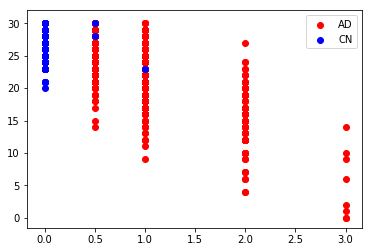

In [119]:
# OASIS['dx1'] = pd.Categorical(OASIS['dx1'])

# numeric_diagnosis = OASIS['dx1'].cat.codes

_ = plt.scatter(ad_subjects['cdr'], ad_subjects['mmse'], c='red')
_ = plt.scatter(cn_subjects['cdr'], cn_subjects['mmse'], c='blue')
_ = plt.legend(['AD','CN'])



In [109]:
pd.unique(OASIS['dx1'])

[Cognitively normal, uncertain dementia, Unc: ques. Impairment, AD dem w/depresss- not contribut, AD Dementia, ..., DAT w/depresss not contribut, AD dem w/oth unusual features/demt on, AD dem w/Frontal lobe/demt at onset, AD dem/FLD prior to AD dem, AD dem w/depresss, not contribut]
Length: 51
Categories (51, object): [Cognitively normal, uncertain dementia, Unc: ques. Impairment,
                          AD dem w/depresss- not contribut, ..., AD dem w/oth unusual features/demt on,
                          AD dem w/Frontal lobe/demt at onset, AD dem/FLD prior to AD dem,
                          AD dem w/depresss, not contribut]

### Play with dataset

In [0]:
#cleaed = OASIS.drop(['Subject', 'M/F', 'Hand', 'YOB'], axis = 1, inplace = True)

#for i in range(4, len(OASIS.columns)):
#  plt.hist(OASIS[OASIS.columns.values.tolist()[i]].fillna(-1))
#  plt.title('Histogram of ' + OASIS.columns.values.tolist()[i])
#  plt.xlabel(OASIS.columns.values.tolist()[i] + " Score")
#  plt.ylabel('Count')
#  plt.xlim([0,OASIS[OASIS.columns.values.tolist()[i]].max])

Text(0, 0.5, 'Count')

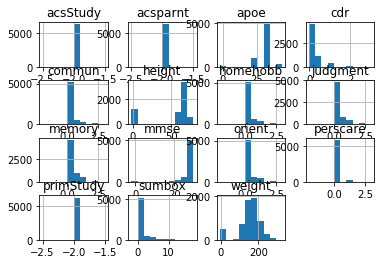

In [42]:
OASIS.hist()

plt.xlabel('Score')
plt.ylabel('Count')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


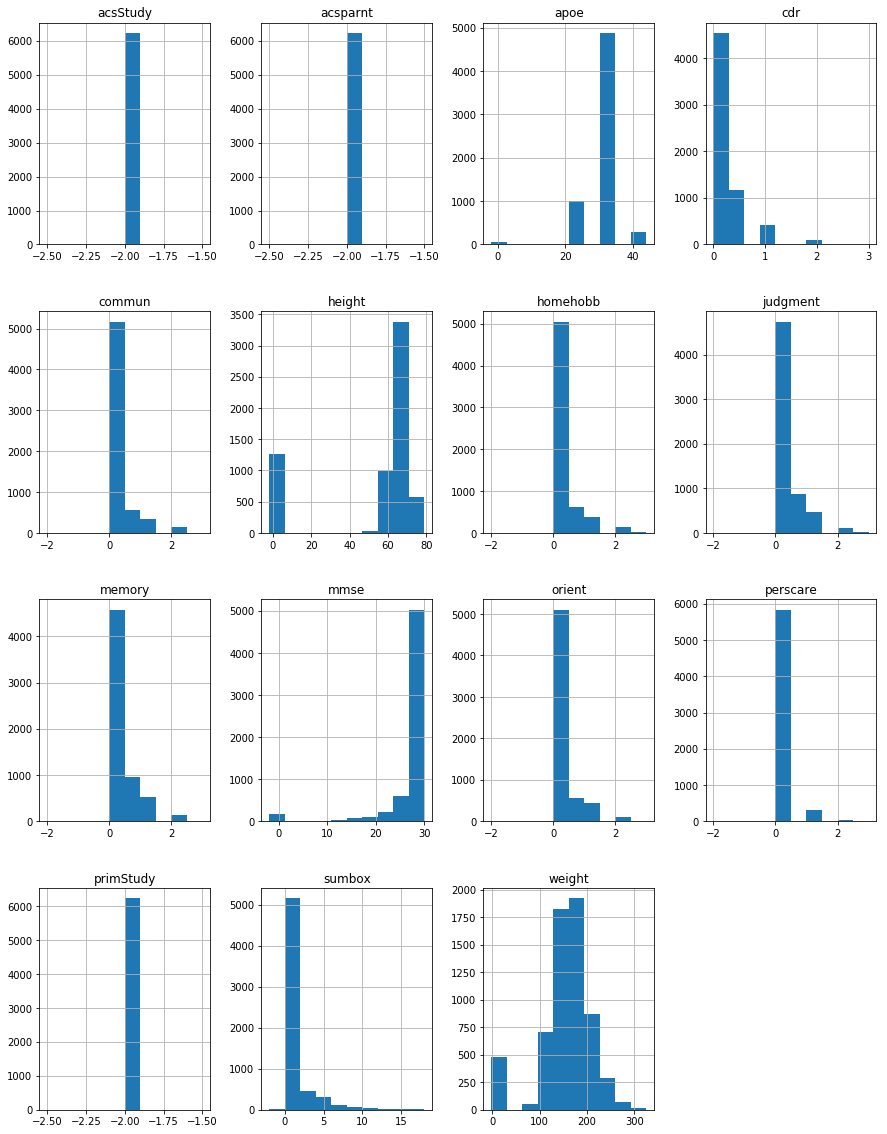

In [43]:
#histograms of multiple 
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
OASIS.hist(ax = ax)

#tring to label the musltiple histograms... Need to figure this out later
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

#From this we can see that we should analyze the top four histograms (ADRC, MR, PETs, Psych Ass.)

#PCA analysis
Link to step-by-step PCA analysis: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

- PCA rotates dataset in a way such that the rotated features are statistically uncorrelated (makes it easier to see the distinction)

 

### load data set into Pandas DataFrame

In [0]:
#only do if you haven't loaded the data

url = #url of data here:

#load dataset into Pandas DataFrame
df = pd.read_csv(url)
#the dataset doesn't need to be named 'df'

### Standarize the Data

This is very **important** because PCA is effected by scale, so you need to scale the features in your data before applying PCA

**StandardScaler** will help standardize the dataset's features (you pick the features) onto until scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [77]:
#import StandardScaler
from sklearn.preprocessing import StandardScaler

#features being analyzed
features = ["mmse", "apoe"]
#defining x and y
x = OASIS.loc[:, features].values   #features
y = OASIS.loc[:,'dx1'].values      #Diagnosis = dx1; target
#Standarizing the features
x = StandardScaler().fit_transform(x)

x

array([[ 0.13587978, -1.59354768],
       [ 0.13587978, -1.59354768],
       [ 0.48128134, -1.59354768],
       ...,
       [ 0.30858056, -1.59354768],
       [ 0.30858056, -1.59354768],
       [ 0.30858056, -1.59354768]])

### PCA Projection to 2D

The code projects the original data into 2 dimentions (2 columns). After dimensionality reduction, there usually isn't a particular meaning assigned to each principal component (that is why we just call it 'principal component 1 and principal component 2'. The new components are just the two main demensions of variation.

In [78]:
#PCA Projection to 2D
#organize the scaled data to components

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,1.030727,-1.222890
1,1.030727,-1.222890
2,0.786491,-1.467126
3,0.786491,-1.467126
4,0.786491,-1.467126
5,0.908609,-1.345008
6,0.786491,-1.467126
7,0.908609,-1.345008
8,0.786491,-1.467126
9,0.786491,-1.467126


In [79]:
#concatenating Dataframe along axis = 1
#finalDf is the final DataFrame before plotting the data
finalDf = pd.concat([principalDf, OASIS[['dx1']]], axis = 1)

finalDf

,principal component 1,principal component 2,dx1
0,1.030727,-1.222890,Cognitively normal
1,1.030727,-1.222890,Cognitively normal
2,0.786491,-1.467126,Cognitively normal
3,0.786491,-1.467126,Cognitively normal
4,0.786491,-1.467126,Cognitively normal
5,0.908609,-1.345008,Cognitively normal
6,0.786491,-1.467126,Cognitively normal
7,0.908609,-1.345008,Cognitively normal
8,0.786491,-1.467126,Cognitively normal
9,0.786491,-1.467126,Cognitively normal


###Visualize 2D Projection

This just plots 2 dimensional data.

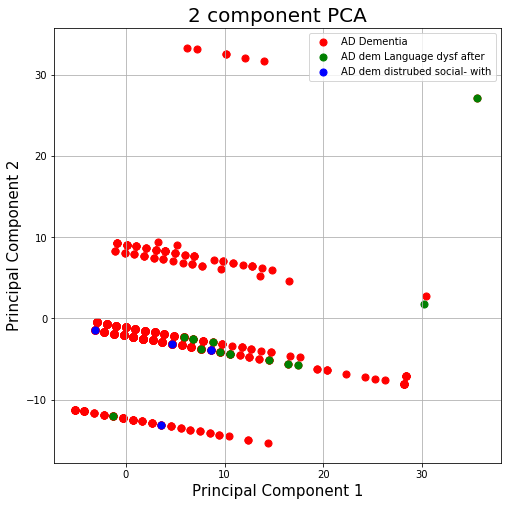

In [68]:
#visualize 2D Projection with different AD variants comparing apoe

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['AD Dementia','AD dem Language dysf after','AD dem distrubed social- with']
colors = ['r', 'g', 'b']
for dx1, color in zip(targets,colors):
    indicesToKeep = finalDf['dx1'] == dx1
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The **Explained Variance** tells you how much information (variance) can be attributed to each of the principal components.This is important because you are decreasing dimensions and will loose some of the variance (information)

In short: you see how much of the information the components have

In [80]:
pca.explained_variance_ratio_

array([0.50740977, 0.49259023])

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
%matplotlib inline

In [0]:
rng=np.random.RandomState(0)
X=rng.randn(2,400)
scale=np.array([[1,0], [0,0.4]])  # Standard deviations are 1 and 0.4
rotate=np.array([[1,-1], [1,1]]) / math.sqrt(2)
transform = np.dot(rotate, scale)
X=np.dot(transform, X)
#X=np.dot(scale, X)
#X=np.dot(rotate, X)
X=X.T
plt.axis('equal')
plt.scatter(X[:,0], X[:,1]);

#k-Means Clustering

k-means clustering is one of the simplest and most commonly used clustering algorithms. It tries to cluster centers that representative of certain regions of the data.

two steps:
- assigning each data point to the closest cluster center 
- setting each cluster center as the mean of the data points that are assigned to it

The algorithm is finished when the assignment of instances to cluster no longer changes

NameError: ignored